original


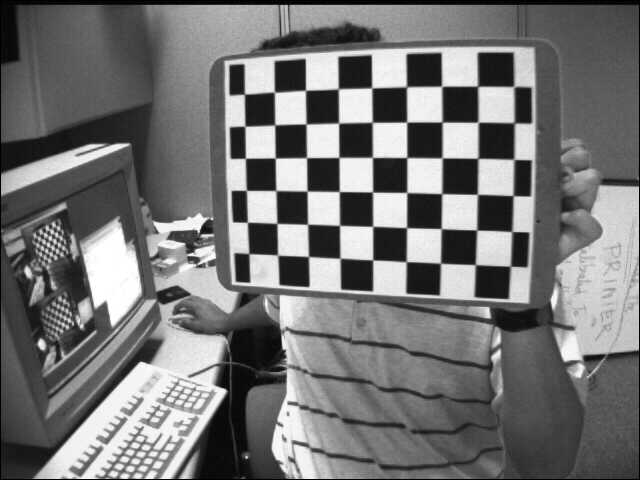

In [1]:
# import packages
import sys
import math
import cv2 as cv
import numpy as np
from IPython import display

# load in image
img = cv.imread("left01.jpg", cv.IMREAD_GRAYSCALE)
#display original
print("original")
display.Image("left01.jpg")


canny edge detection


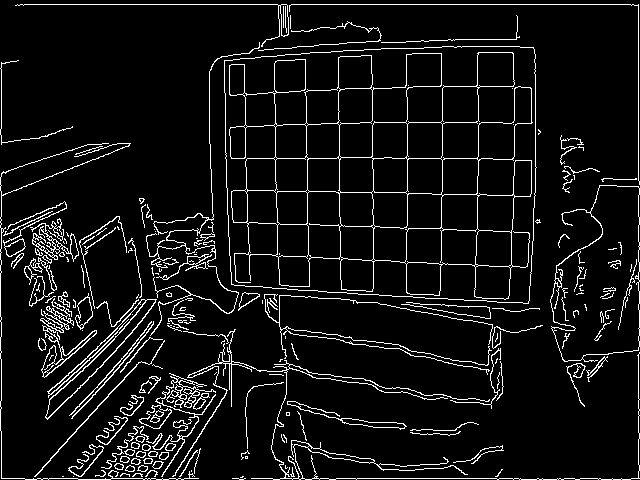

In [2]:
# Q1 canny edge detection
canny = cv.Canny(img, 100, 200)
# save
cv.imwrite("canny.png", canny)
# display
print("canny edge detection")
display.Image("canny.png")


standard hough line


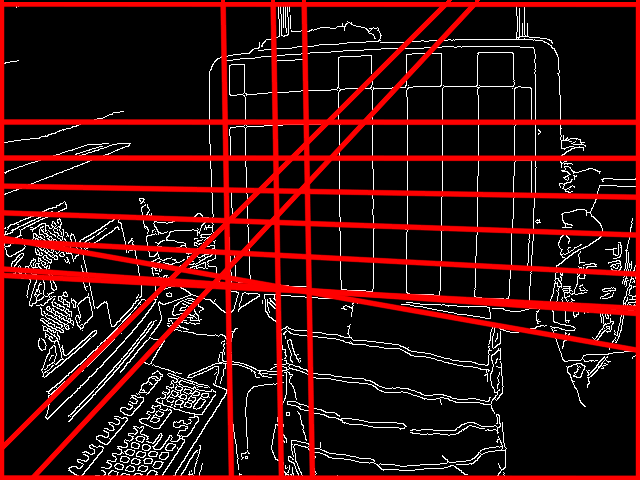

In [3]:

# Q2

# Copy edges to the images that will display the results in BGR
dst = cv.Canny(img, 50, 200, None, 3)
# 
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
# 
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

# standard
cv.imwrite("stdHough.png", cdst)

# probabilistic
cv.imwrite("probHough.png", cdstP)

# standard
print("standard hough line")
display.Image("stdHough.png")


probabilistic hough lines


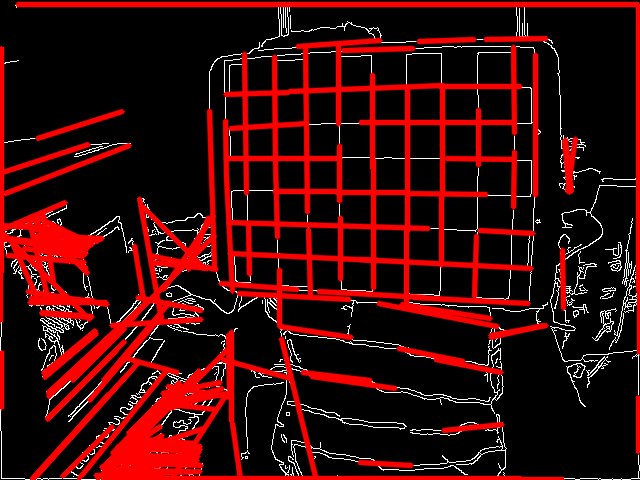

In [4]:

# probabilistic
print("probabilistic hough lines")
display.Image("probHough.png")
